In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from scipy import stats

In [2]:
path="PDS marksheet.csv"
df=pd.read_csv(path)
df

,Serial No,Roll No,CT,MID,Total
0,103.0,24BT10016,38.0,89.0,127.0
1,39.0,24AG10038,40.0,85.0,125.0
2,65.0,24AG10065,40.0,85.0,125.0
3,62.0,24AG10062,40.0,81.0,121.0
4,22.0,24AG10020,37.0,84.0,121.0
...,...,...,...,...,...
193,125.0,24BT10038,11.0,5.0,16.0
194,102.0,24BT10015,0.0,12.0,12.0
195,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,0.0


In [3]:
df = df.dropna()
df

,Serial No,Roll No,CT,MID,Total
0,103.0,24BT10016,38.0,89.0,127.0
1,39.0,24AG10038,40.0,85.0,125.0
2,65.0,24AG10065,40.0,85.0,125.0
3,62.0,24AG10062,40.0,81.0,121.0
4,22.0,24AG10020,37.0,84.0,121.0
...,...,...,...,...,...
190,64.0,24AG10064,7.0,22.0,29.0
191,68.0,24AG10068,28.0,0.0,28.0
192,9.0,24AG10007,7.0,19.0,26.0
193,125.0,24BT10038,11.0,5.0,16.0


In [4]:
df_sorted = df.sort_values(by='Roll No', ascending=False)
df_sorted

,Serial No,Roll No,CT,MID,Total
115,195.0,24EX10043,37.0,35.5,72.5
70,194.0,24EX10042,35.0,56.5,91.5
128,193.0,24EX10041,25.0,43.5,68.5
39,192.0,24EX10040,39.0,63.5,102.5
169,191.0,24EX10039,29.0,17.5,46.5
...,...,...,...,...,...
175,5.0,24AG10003,20.0,21.5,41.5
78,4.0,24AG10002,28.0,61.0,89.0
160,3.0,24AG10001,23.0,29.0,52.0
84,2.0,23ME10017,29.0,59.0,88.0


In [5]:
df_cleaned = df_sorted.drop([88,84])
df_cleaned.tail()

,Serial No,Roll No,CT,MID,Total
83,7.0,24AG10005,31.0,57.0,88.0
163,6.0,24AG10004,35.0,16.0,51.0
175,5.0,24AG10003,20.0,21.5,41.5
78,4.0,24AG10002,28.0,61.0,89.0
160,3.0,24AG10001,23.0,29.0,52.0


In [6]:
df_cleaned['Department']= df['Roll No'].str.extract(r'(\D{2})')
df_cleaned.head()

,Serial No,Roll No,CT,MID,Total,Department
115,195.0,24EX10043,37.0,35.5,72.5,EX
70,194.0,24EX10042,35.0,56.5,91.5,EX
128,193.0,24EX10041,25.0,43.5,68.5,EX
39,192.0,24EX10040,39.0,63.5,102.5,EX
169,191.0,24EX10039,29.0,17.5,46.5,EX


<Figure size 3200x900 with 0 Axes>

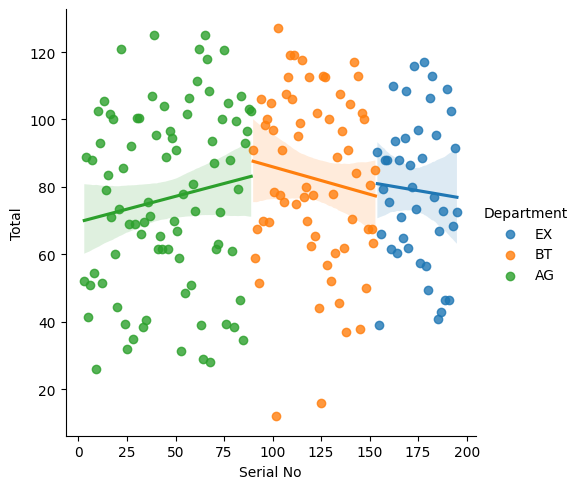

In [7]:
plt.figure(figsize=(32,9))
sns.lmplot(x='Serial No', y='Total', hue='Department', data=df_cleaned)

<Axes: xlabel='Department', ylabel='Total'>

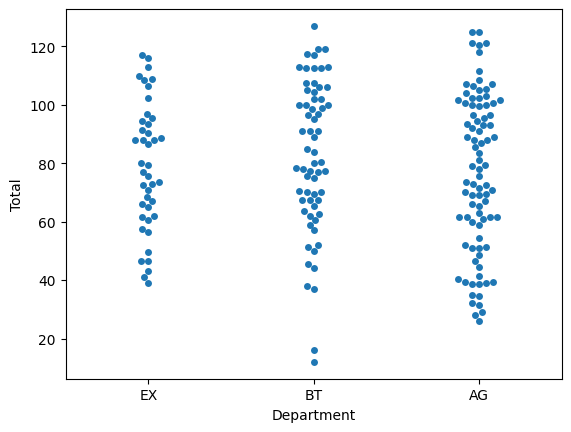

In [8]:
sns.swarmplot(x=df_cleaned['Department'],
              y=df_cleaned['Total'])

In [9]:
grouped_stats = df_cleaned.groupby('Department')['Total'].agg(['mean', lambda x: stats.mode(x, keepdims=True)[0][0]])
grouped_stats.rename(columns={'mean': 'Mean', '<lambda_0>': 'Mode'}, inplace=True)

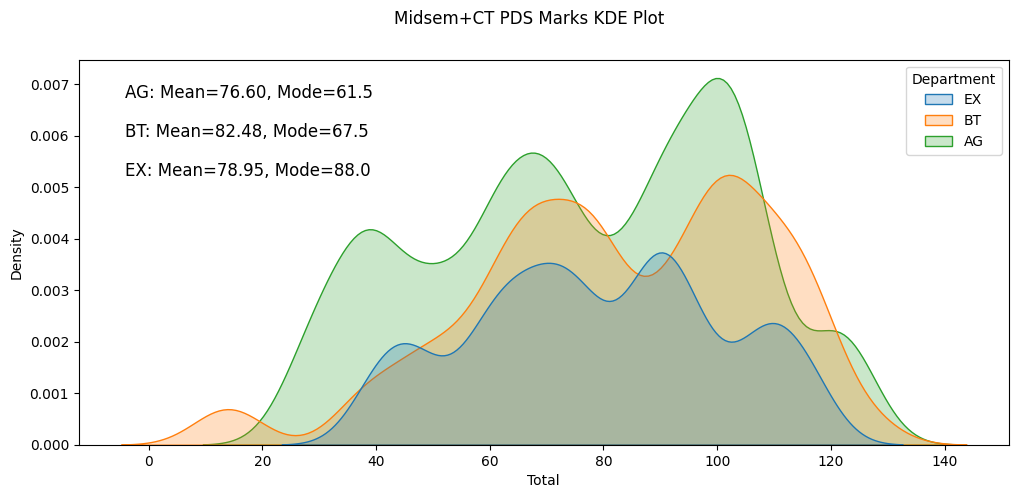

In [10]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=df_cleaned, x='Total', hue='Department', fill=True, bw_adjust=0.5)
for dept, row in grouped_stats.iterrows():
    mean_value = row['Mean']
    mode_value = row['Mode']
    plt.text(0.05, 0.9 - (list(grouped_stats.index).index(dept) * 0.1),  # Adjusting position
             f"{dept}: Mean={mean_value:.2f}, Mode={mode_value}", 
             transform=plt.gca().transAxes, fontsize=12, color='black')
plt.suptitle('Midsem+CT PDS Marks KDE Plot')
plt.show()

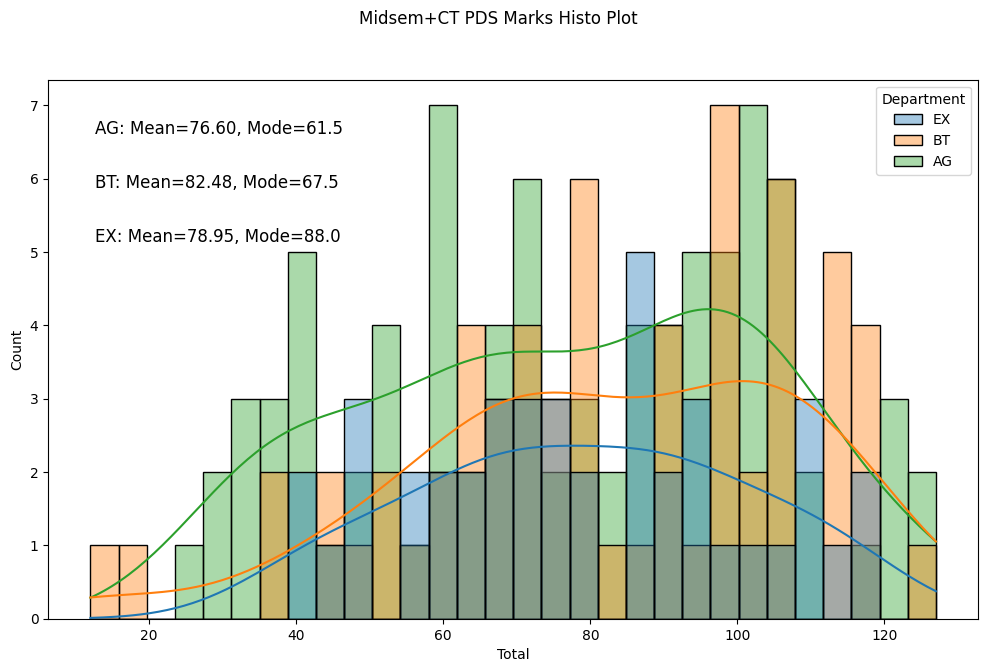

In [11]:
plt.figure(figsize=(12,7))
sns.histplot(data=df_cleaned, x='Total', hue='Department', kde=True, bins=30, alpha=0.4)
for dept, row in grouped_stats.iterrows():
    mean_value = row['Mean']
    mode_value = row['Mode']
    plt.text(0.05, 0.9 - (list(grouped_stats.index).index(dept) * 0.1),  # Adjusting position
             f"{dept}: Mean={mean_value:.2f}, Mode={mode_value}", 
             transform=plt.gca().transAxes, fontsize=12, color='black')
plt.suptitle('Midsem+CT PDS Marks Histo Plot')
plt.show()

In [12]:
top_scorers = df_cleaned.groupby('Department').apply(lambda x: x.nlargest(3, 'Total')).reset_index(drop=True)
print(top_scorers)

   Serial No    Roll No    CT   MID  Total Department
0       65.0  24AG10065  40.0  85.0  125.0         AG
1       39.0  24AG10038  40.0  85.0  125.0         AG
2       62.0  24AG10062  40.0  81.0  121.0         AG
3      103.0  24BT10016  38.0  89.0  127.0         BT
4      111.0  24BT10024  38.0  81.0  119.0         BT
5      109.0  24BT10022  39.0  80.0  119.0         BT
6      178.0  24EX10025  38.0  79.0  117.0         EX
7      173.0  24EX10020  37.0  79.0  116.0         EX
8      182.0  24EX10029  38.0  75.0  113.0         EX


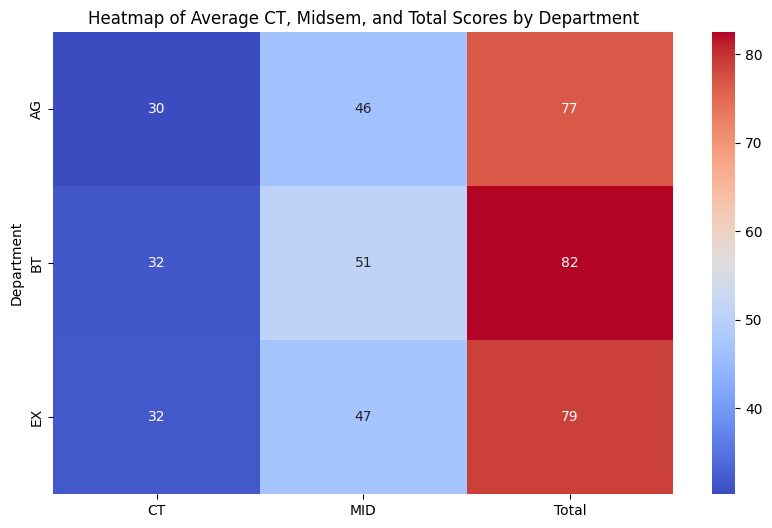

In [13]:
heatmap_data = df_cleaned.pivot_table(index='Department', values=['CT', 'MID', 'Total'], aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)

plt.title('Heatmap of Average CT, Midsem, and Total Scores by Department')
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')
plt.show()